# FB PROPHET MODEL FOR CLOSE PRICE PREDICTION

11:55:55 - cmdstanpy - INFO - Chain [1] start processing
11:56:01 - cmdstanpy - INFO - Chain [1] done processing


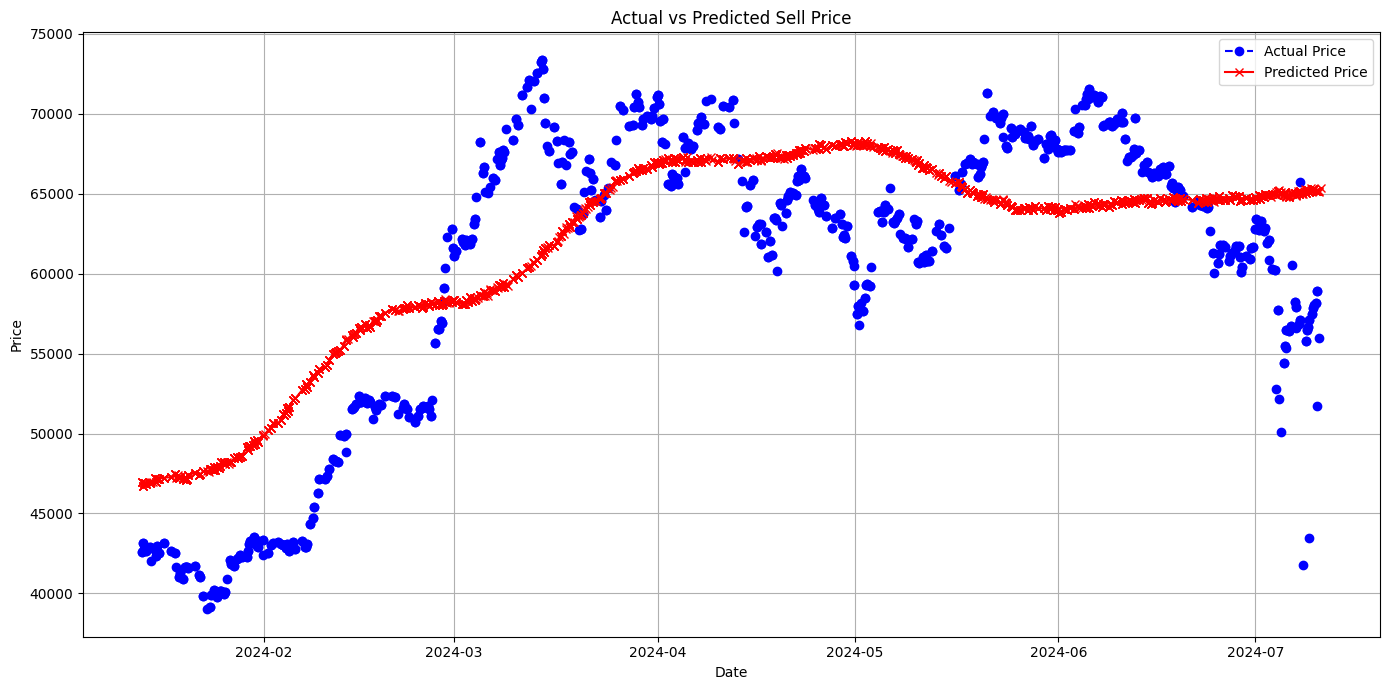

In [6]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

# Load your train and test data
train = pd.read_csv('Train.csv')  # Adjust file name and path as needed
test = pd.read_csv('Test.csv')    # Adjust file name and path as needed

# Prepare the data for Prophet
train.rename(columns={'date_time': 'ds', 'sell_price': 'y'}, inplace=True)
test.rename(columns={'date_time': 'ds', 'sell_price': 'y'}, inplace=True)

train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])

# Initialize and train the Prophet model
model = Prophet()
model.fit(train)

# Create a dataframe with future dates from the test set
future = test[['ds']]

# Predict future prices
forecast = model.predict(future)

# Extract the predicted prices and actual prices
predicted_prices = forecast[['ds', 'yhat']]
actual_prices = test[['ds', 'y']]

# Merge predicted and actual prices
results = pd.merge(actual_prices, predicted_prices, on='ds', how='left')

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(results['ds'], results['y'], label='Actual Price', color='blue', linestyle='--', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted Price', color='red', linestyle='-', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Sell Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('actual_vs_predicted_prices.png')

# Show the plot
plt.show()


In [2]:
import numpy as np
results['FB_signal'] = np.where(results['y'] > results['yhat'], 1, -1)
print(results[['FB_signal']])


      FB_signal
0            -1
1            -1
2            -1
3            -1
4            -1
...         ...
2059         -1
2060         -1
2061         -1
2062         -1
2063         -1

[2064 rows x 1 columns]


In [3]:
results.to_csv('results_with_signals.csv', index=False)


In [7]:
from prophet.serialize import model_to_json, model_from_json
model = Prophet()
model.fit(train)

with open('prophet_model.json', 'w') as f:
    f.write(model_to_json(model))


11:56:09 - cmdstanpy - INFO - Chain [1] start processing
11:56:14 - cmdstanpy - INFO - Chain [1] done processing
